## 6-4. tSNE를 이용한 시각화와 차원축소의 효과
tSNE는 시각화를 위해 사용되는 비지도학습 알고리즘으로 다차원 데이터 사이의 거리를 가장 잘 보존하는 2차원 좌표를 찾기 위해 사용된다. 즉 2차원 공간으로 데이터 간의 거리를 매핑함으로써 시각적으로 이를 쉽게 파악할 수 있도록 해준다. tSNE를 이용해 그린 그래프에서 모양이 좋게 나타난다면 원래의 다차원 데이터 간의 거리도 의미 있게 잘 계산된다고 생각할 수 있다.

앞에서 내재된 의미를 이용해 문서들 간의 거리를 계산했는데, 원래의 TFIDF를 이용한 문서 간 거리에 비해 문서의 유형을 더 잘 표현한다고할 수 있을까? 다시 말해서 예제 데이터를 구성할 때 20 뉴스그룹으로부터 4개의 뉴스그룹을 선택했는데, 동일한 뉴스그룹에 있는 문서들은 다른 무서들에 비해 거리가 가까울 것이라고 예상할 수 있다. 즉 잠재된 의미들이 문서들의 유형을 잘 파악하고 있다면, 2차원 공간에 문서들을 시각화했을 때 같은 카테고리의 문서는 서로 가깝게 분포해야 할 것이다.

이를 확인하기 위해 먼저 TFIDF GODFUFDMF tSNE로 시각화해보고, 다음으로 LSA 행렬을 시각화해서 둘을 비교해보기로 한다. 다음은 matplotlib을 로드하고 음수 기호가 깨지는 것을 방지하는 코드다.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

기본적으로 tSNE도 차원을 축소하는 알고리즘이라고 할 수 있다. 사이킷런은 tSNE를 지원하기 위해 [TSNE 클래스](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)를 제공한다. 사용법은 TruncatedSVD와 유사하므로 상세한 설명은 생략한다. 시각화는 앞의 토픽 분석에 사용한 데이터를 그대로 활용한다. 아래와 같이 객체를 선언한 후 2차원 좌표로 변환한다. 그 후 두 개의 축을 이용해 시각화한다. 이때 문서 유형이 그래프에 표현되도록 하기 위해 plt.text()를 이용해 문서의 카테고리에 해당하는 숫자를 그래프에 출력한다.

In [2]:
% store -r X_train
% store -r X_test
% store -r y_train
% store -r y_test
% store -r newsgroups_train
% store -r newsgroups_test

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

RegTok = RegexpTokenizer("[\w']{3,}")
english_stops = set(stopwords.words('english')) 

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower())
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    features = (list(map(lambda token: PorterStemmer().stem(token), words)))
    return features

/Users/sysanal/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/sysanal/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


TSNE dimension: (2034, 2)


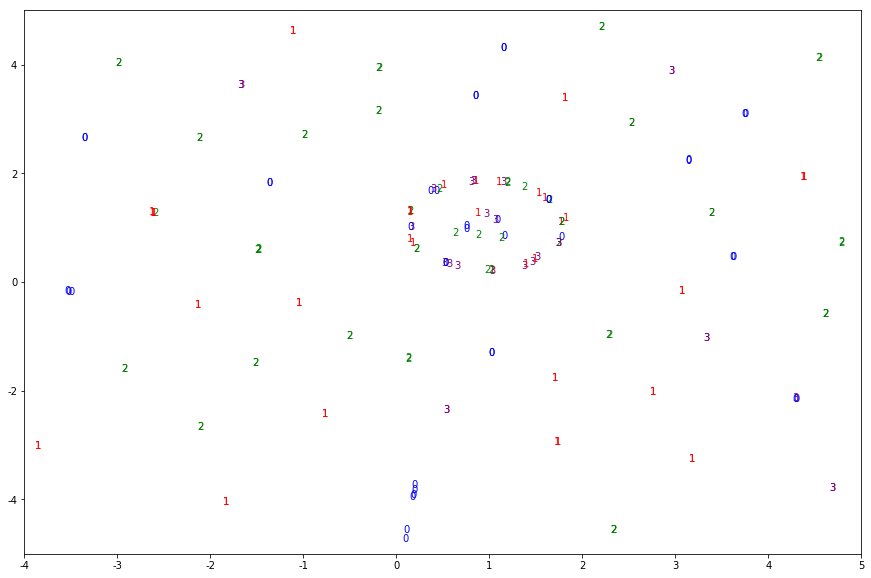

In [4]:
from sklearn.manifold import TSNE

tfidf = TfidfVectorizer(tokenizer=tokenizer)
X_train_tfidf = tfidf.fit_transform(X_train) # train set을 변환
X_test_tfidf = tfidf.transform(X_test) # test set을 변환

tsne = TSNE(n_components=2, random_state=7)
tsne_tfidf = tsne.fit_transform(X_train_tfidf)
print('TSNE dimension:', tsne_tfidf.shape)

def tsne_graph(tsne_2, label, lim=None):
    colors = {0:'blue', 1:'red', 2:'green', 3:'purple'}
    x = tsne_2[:,0] # 압축된 첫 차원을 x축으로 이용
    y = tsne_2[:,1] # 압축된 둘째 차원은 y축으로 이용
    plt.figure(figsize=(15,10))
    if lim == None:
        lim = [min(x), max(x), min(y), max(y)]
    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[2], lim[3])
    for i in range(len(x)):
        # 각 값에 대해 y값 즉 label에 따라 색을 바꿔가며 text로 그래프에 출력
        if (lim[0] < x[i] < lim[1]) and (lim[2] < y[i] < lim[3]):
            plt.text(x[i], y[i], label[i], color = colors[label[i]])
    plt.show()
    
tsne_graph(tsne_tfidf, y_train, (-4, 5, -5, 5))

위 결과를 보면 각 카테고리에 해당하는 문서들이 유형에 관계없이 특이하게 분포하는 것을 볼 수 있다. 무언가 패턴이 있기는 하지만, 이 그래프를 봐서는 사실상 카테고리를 구분하기 어렵다.

이제 LSA를 이용해 차원을 축소한 후, 다시 tSNE로 시각화해본다.

LSA Converted X shape: (2034, 100)
Sum of explained variance ratio: 0.209


/Users/sysanal/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/sysanal/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


TSNE dimension: (2034, 2)
# Selected categories: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


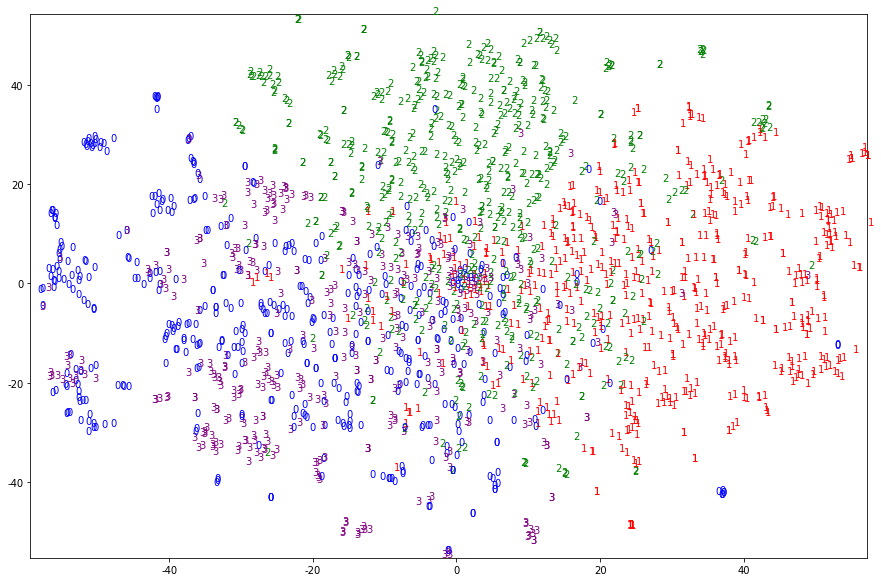

In [5]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=1) # 압축할 component의 수 지정
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print('LSA Converted X shape:', X_train_lsa.shape)
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

tsne_lsa = tsne.fit_transform(X_train_lsa)
print('TSNE dimension:', tsne_lsa.shape)
print('# Selected categories:', newsgroups_train.target_names)

tsne_graph(tsne_lsa, y_train)

위 결과는 TFIDF 행렬을 바로 시각화한 것이 비해 훨씬 정리된 모습을 보여준다. 서로 겹치는 부분이 있기는 하지만 카테고리 1과 2는 비교적 분명하게 자신의 영역을 가지고 있다. 반면 0과 3은 겹치는 부분도 있고, 나뉘어진 부분도 보인다. 0과 3의 카테고리명을 보면 이유를 알 수 있는데, 각 카테고리명은 'alt.atheism'과 'talk.religion.misc'로 우리말로는 무신론과 종교다. 당연히 무신론과 종교는 유사한 주제를 다루므로 겹치는 부분이 발생할 수밖에 없을 것이다.

위에서 보는 바와 같이 LSA와 tSNE를 결합하면 문서의 의미에 따른 분류를 더 명확하게 시각화할 수 있으며, 실제로도 많이 사용되는 분석방법이다. 최근에는 딥러닝의 오토인코더가 차원 축소 분야에서 LSA보다 나은 성능을 보여주기도 한다.